# Librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
import re

In [2]:
fifa=pd.read_csv('fifa_clean.csv')

C:\Users\akram\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# Correlación 

In [3]:
fifa.head()

,sofifa_id,short_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,lb,lcb,cb,rcb,rb,gk,log_value_eur,log_wage_eur,work_rate_attacking,work_rate_deffensive
0,158023,L. Messi,RW,93,93,78000000.0,320000.0,34,1987-06-24,170,...,61,50,50,50,61,19,18.172219,12.676076,2,1
1,188545,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,...,61,60,60,60,61,19,18.598827,12.506177,3,2
2,20801,Cristiano Ronaldo,ST,91,91,45000000.0,270000.0,36,1985-02-05,187,...,60,53,53,53,60,20,17.622173,12.506177,3,1
3,190871,Neymar Jr,LW,91,91,129000000.0,270000.0,29,1992-02-05,175,...,62,50,50,50,62,20,18.675323,12.506177,3,2
4,192985,K. De Bruyne,CM,91,91,125500000.0,350000.0,30,1991-06-28,181,...,75,69,69,69,75,21,18.647816,12.765688,3,3


In [4]:
fifa.shape

(19165, 98)

In [5]:
obsv1=fifa[[
'ls',                                                     
'rs',                           
'lw',                           
'lf',                           
'cf',                           
'rf',                           
'rw',                           
'lam',                          
'cam',                          
'ram',                          
'lm',                           
'lcm',                          
'cm' ,                          
'rcm',                          
'rm' ,                          
'lwb',                          
'ldm',                          
'cdm',                          
'rdm',                          
'rwb',                          
'lb',                          
'lcb',                          
'cb',                          
'rcb',                          
'rb',                          
'gk',
'wage_eur'
]]

In [5]:
fifa.corr()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,lb,lcb,cb,rcb,rb,gk,log_value_eur,log_wage_eur,work_rate_attacking,work_rate_deffensive
sofifa_id,1.000000,-0.495189,0.035672,-0.128102,-0.255724,-0.781547,-0.101291,-0.208677,0.114001,-0.036461,...,-0.156274,-0.193249,-0.193249,-0.193249,-0.156274,-0.143861,-0.172969,-0.401002,-0.012398,-0.068233
overall,-0.495189,1.000000,0.644215,0.554684,0.601886,0.461470,0.042175,0.149767,-0.226787,-0.178710,...,0.427837,0.399424,0.399424,0.399424,0.427837,0.047886,0.886733,0.783273,0.164135,0.101768
potential,0.035672,0.644215,1.000000,0.527738,0.497686,-0.263555,0.004094,-0.017088,-0.330615,-0.152565,...,0.270047,0.218345,0.218345,0.218345,0.270047,-0.010159,0.833850,0.558157,0.141273,0.049860
value_eur,-0.128102,0.554684,0.527738,1.000000,0.823527,0.042886,0.010291,0.035188,-0.191468,-0.117917,...,0.225206,0.188956,0.188956,0.188956,0.225206,0.010523,0.648942,0.513778,0.122051,0.058052
wage_eur,-0.255724,0.601886,0.497686,0.823527,1.000000,0.159874,0.028001,0.066221,-0.240411,-0.126597,...,0.250538,0.223596,0.223596,0.223596,0.250538,0.011322,0.639551,0.690594,0.102118,0.067428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gk,-0.143861,0.047886,-0.010159,0.010523,0.011322,0.145830,0.374505,0.354653,-0.019344,-0.023099,...,-0.719232,-0.623936,-0.623936,-0.623936,-0.719232,1.000000,-0.075633,-0.010746,-0.147970,-0.054386
log_value_eur,-0.172969,0.886733,0.833850,0.648942,0.639551,0.041285,-0.017659,0.027942,-0.292068,-0.175014,...,0.437952,0.373490,0.373490,0.373490,0.437952,-0.075633,1.000000,0.753616,0.204072,0.068174
log_wage_eur,-0.401002,0.783273,0.558157,0.513778,0.690594,0.288180,0.049717,0.097711,-0.339715,-0.113919,...,0.358490,0.330541,0.330541,0.330541,0.358490,-0.010746,0.753616,1.000000,0.137187,0.082343
work_rate_attacking,-0.012398,0.164135,0.141273,0.122051,0.102118,-0.000695,-0.259830,-0.205548,-0.049810,-0.005297,...,0.109992,-0.017143,-0.017143,-0.017143,0.109992,-0.147970,0.204072,0.137187,1.000000,-0.106150


In [7]:
print(fifa[['overall'               , 'value_eur']].corr())
print(fifa[['potential'            ,'value_eur']].corr())
print(fifa[['value_eur'            ,'value_eur']].corr())
print(fifa[['wage_eur'             ,'value_eur']].corr())
print(fifa[['age'                  ,'value_eur']].corr())
print(fifa[['height_cm'            ,'value_eur']].corr())
print(fifa[['weight_kg'            ,'value_eur']].corr())
print(fifa[['club_team_id'         ,'value_eur']].corr())
print(fifa[['league_level'          ,'value_eur']].corr())
print(fifa[['club_loaned_from'     ,'value_eur']].corr())
print(fifa[['nation_team_id'       ,'value_eur']].corr())
print(fifa[['preferred_foot'             ,'value_eur']].corr())
print(fifa[['weak_foot'                  ,'value_eur']].corr())
print(fifa[['skill_moves'                ,  'value_eur']].corr())
print(fifa[['international_reputation'   ,'value_eur']].corr())
print(fifa[['release_clause_eur'         ,'value_eur']].corr())
print(fifa[['pace'                       ,'value_eur']].corr())
print(fifa[['shooting'                   ,'value_eur']].corr())
print(fifa[['passing'                    ,'value_eur']].corr())
print(fifa[['dribbling'                  ,'value_eur']].corr())
print(fifa[['defending'                  ,'value_eur']].corr())
print(fifa[['physic'                     ,'value_eur']].corr())
print(fifa[['attacking_crossing'         ,'value_eur']].corr())
print(fifa[['attacking_finishing'        ,'value_eur']].corr())
print(fifa[['attacking_heading_accuracy' ,'value_eur']].corr())
print(fifa[['attacking_short_passing'    ,'value_eur']].corr())
print(fifa[['attacking_volleys'          ,'value_eur']].corr())
print(fifa[['skill_dribbling'            , 'value_eur']].corr())
print(fifa[['skill_curve'                , 'value_eur']].corr())
print(fifa[['skill_fk_accuracy'          , 'value_eur']].corr())
print(fifa[['skill_long_passing'         , 'value_eur']].corr())
print(fifa[['skill_ball_control'         , 'value_eur']].corr())
print(fifa[['movement_acceleration'      , 'value_eur']].corr())
print(fifa[['movement_sprint_speed'      , 'value_eur']].corr())
print(fifa[['movement_agility'           , 'value_eur']].corr())
print(fifa[['movement_reactions'         , 'value_eur']].corr())
print(fifa[['movement_balance'           , 'value_eur']].corr())
print(fifa[['power_shot_power'           , 'value_eur']].corr())
print(fifa[['power_jumping'              , 'value_eur']].corr())
print(fifa[['power_stamina'              , 'value_eur']].corr())
print(fifa[['power_strength'             , 'value_eur']].corr())
print(fifa[['power_long_shots'           , 'value_eur']].corr())
print(fifa[['mentality_aggression'       , 'value_eur']].corr())
print(fifa[['mentality_interceptions'    , 'value_eur']].corr())
print(fifa[['mentality_positioning'      , 'value_eur']].corr())
print(fifa[['mentality_vision'           , 'value_eur']].corr())
print(fifa[['mentality_penalties'        , 'value_eur']].corr())
print(fifa[['mentality_composure'        , 'value_eur']].corr())
print(fifa[['defending_marking_awareness', 'value_eur']].corr())
print(fifa[['defending_standing_tackle'  , 'value_eur']].corr())
print(fifa[['defending_sliding_tackle'   , 'value_eur']].corr())
print(fifa[['goalkeeping_diving'         , 'value_eur']].corr())
print(fifa[['goalkeeping_handling'       , 'value_eur']].corr())
print(fifa[['goalkeeping_kicking'        , 'value_eur']].corr())
print(fifa[['goalkeeping_positioning'    , 'value_eur']].corr())
print(fifa[['goalkeeping_reflexes'       , 'value_eur']].corr())
print(fifa[['work_rate_attacking'         ,'value_eur']].corr())
print(fifa[['work_rate_deffensive'       ,'value_eur']].corr())

            overall  value_eur
overall    1.000000   0.554684
value_eur  0.554684   1.000000
           potential  value_eur
potential   1.000000   0.527738
value_eur   0.527738   1.000000
           value_eur  value_eur
value_eur        1.0        1.0
value_eur        1.0        1.0
           wage_eur  value_eur
wage_eur   1.000000   0.823527
value_eur  0.823527   1.000000
                age  value_eur
age        1.000000   0.042886
value_eur  0.042886   1.000000
           height_cm  value_eur
height_cm   1.000000   0.010291
value_eur   0.010291   1.000000
           weight_kg  value_eur
weight_kg   1.000000   0.035188
value_eur   0.035188   1.000000
              club_team_id  value_eur
club_team_id      1.000000  -0.191468
value_eur        -0.191468   1.000000
              league_level  value_eur
league_level      1.000000  -0.117917
value_eur        -0.117917   1.000000
                  club_loaned_from  value_eur
club_loaned_from          1.000000   0.005134
value_eur        

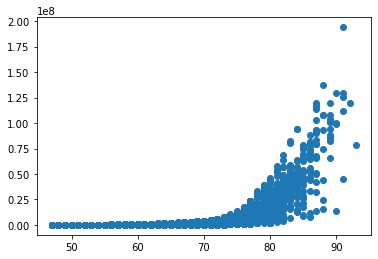

In [8]:
plt.scatter(fifa.overall,fifa.value_eur)

In [9]:
plt.rcParams['figure.figsize']=[100,100]

<AxesSubplot:>

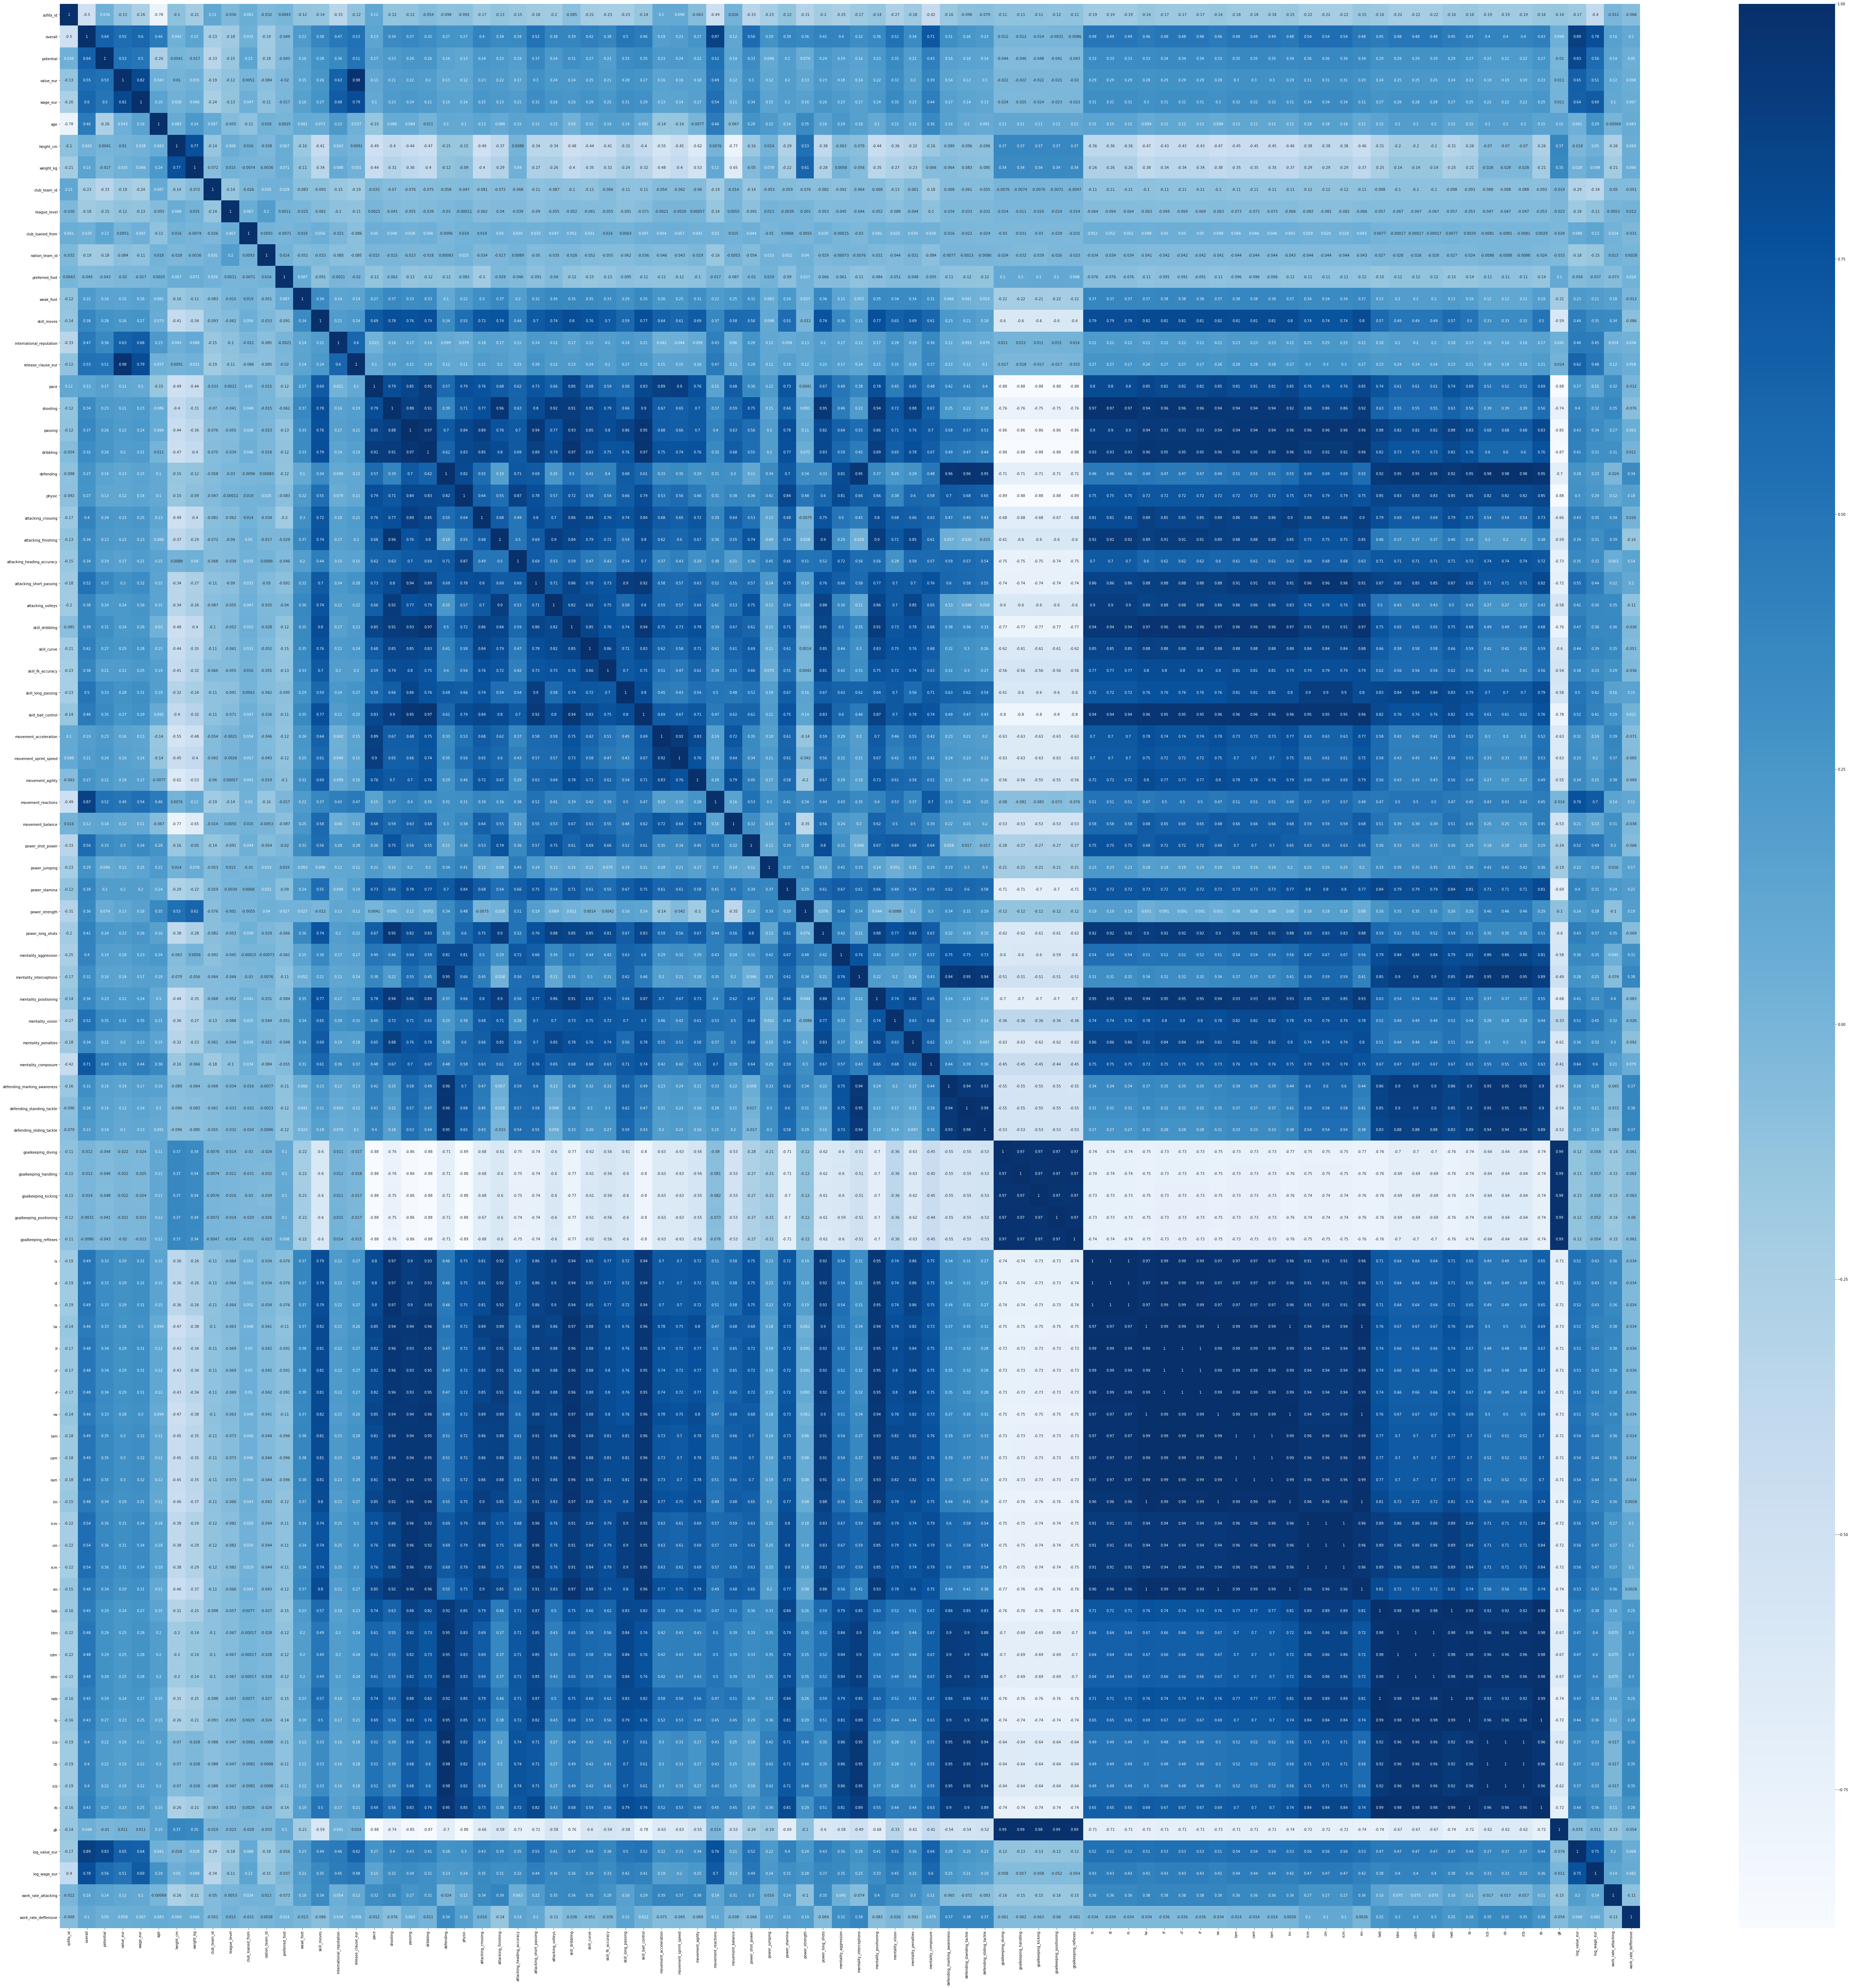

In [10]:
sns.heatmap(data=fifa.corr(),cmap='Blues',annot=True)

In [ ]:
obsv1.corr('kendall')

In [ ]:
fifa.info()